# ING Lion's Den 2024 
Excersise 1: Part II - Data Visualisation and Statistical Describe 



## Team: RiskBusters


 Michał Bryzik, Michał Niegierewicz, Kacper Gruca, Jan Ślusarek

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../data/output/development_sample_cleaned.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35700 entries, 0 to 35699
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   working_months  35700 non-null  float64
 1   ID              35700 non-null  int64  
 2   customer_id     35700 non-null  int64  
 3   _r_             35700 non-null  float64
 4   Var1            35700 non-null  int64  
 5   Var4            35700 non-null  int64  
 6   Var5            35700 non-null  int64  
 7   Var6            35700 non-null  int64  
 8   Var7            35700 non-null  float64
 9   Var15           35700 non-null  int64  
 10  Var16           35700 non-null  int64  
 11  Var17           35700 non-null  float64
 12  Var20           35700 non-null  int64  
 13  Var21           35700 non-null  int64  
 14  Var22           35700 non-null  int64  
 15  Var23           35700 non-null  int64  
 16  Var24           35700 non-null  int64  
 17  Var25           35700 non-null 

## Data visualisation 

Creating histograms for both numeric and binary variables 

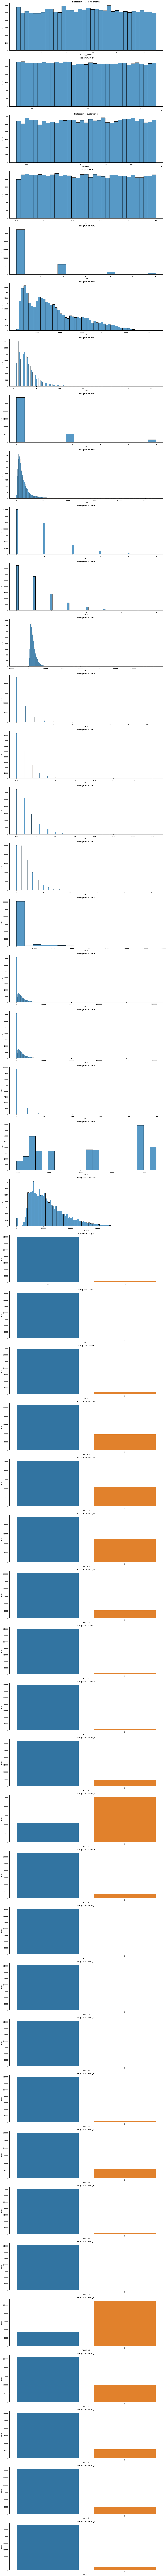

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Searching a index for 'target', because ater (including) this index we have binary variables 
# Before we have only numerical
target_index = df.columns.get_loc('target')

# Dividing numerical and binary variables based on order of df 
num_vars = df.columns[:target_index]
bin_vars = df.columns[target_index:]

# Settings for canvas
plt.figure(figsize=(15, 5 * len(df.columns)))

# Draw histograms for numeric variables
for i, var in enumerate(num_vars, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.histplot(df[var], kde=False)
    plt.title(f'Histogram of {var}')

# Draw frequency histograms for binary variables 
for i, var in enumerate(bin_vars, len(num_vars) + 1):
    plt.subplot(len(df.columns), 1, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Bar plot of {var}')

plt.tight_layout()
plt.show()



Creating boxplots for numeric variables

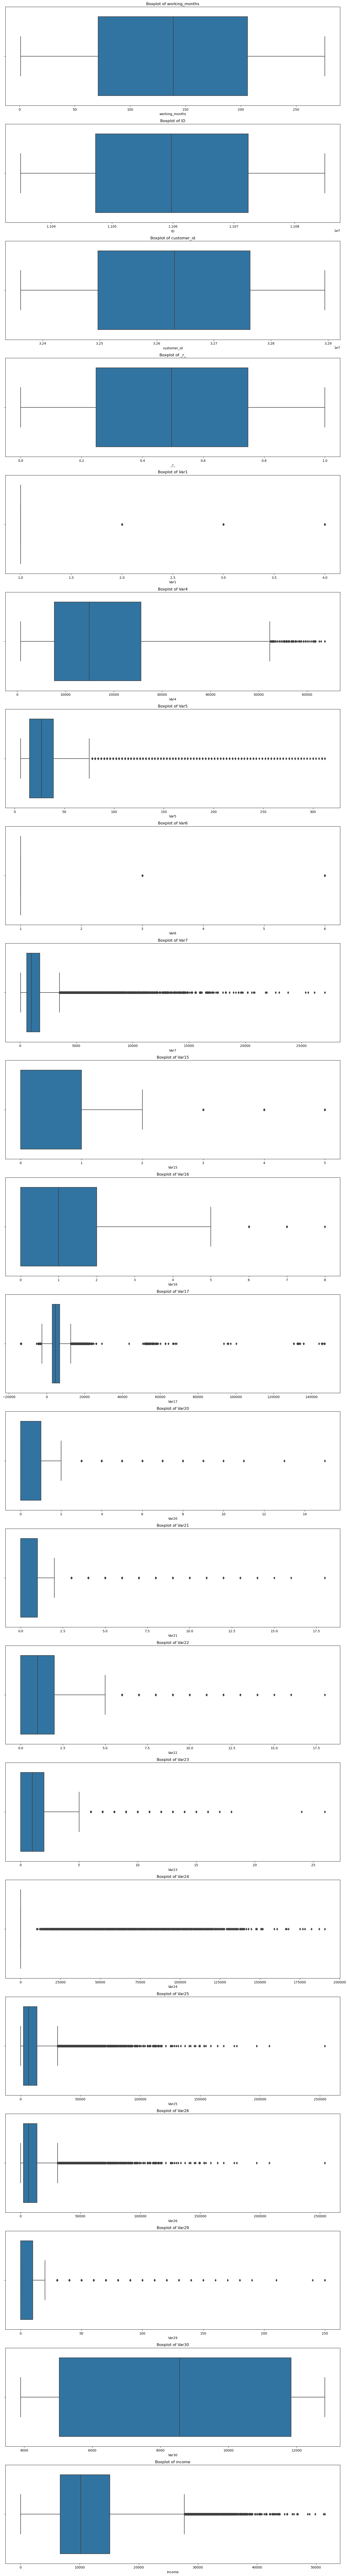

In [11]:
# Setting canvas for plots 
plt.figure(figsize=(15, 5 * len(num_vars)))

# Draw boxplots for numeric variables 
for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)  
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

Creating a heatmap for all variables in dataset 'df'

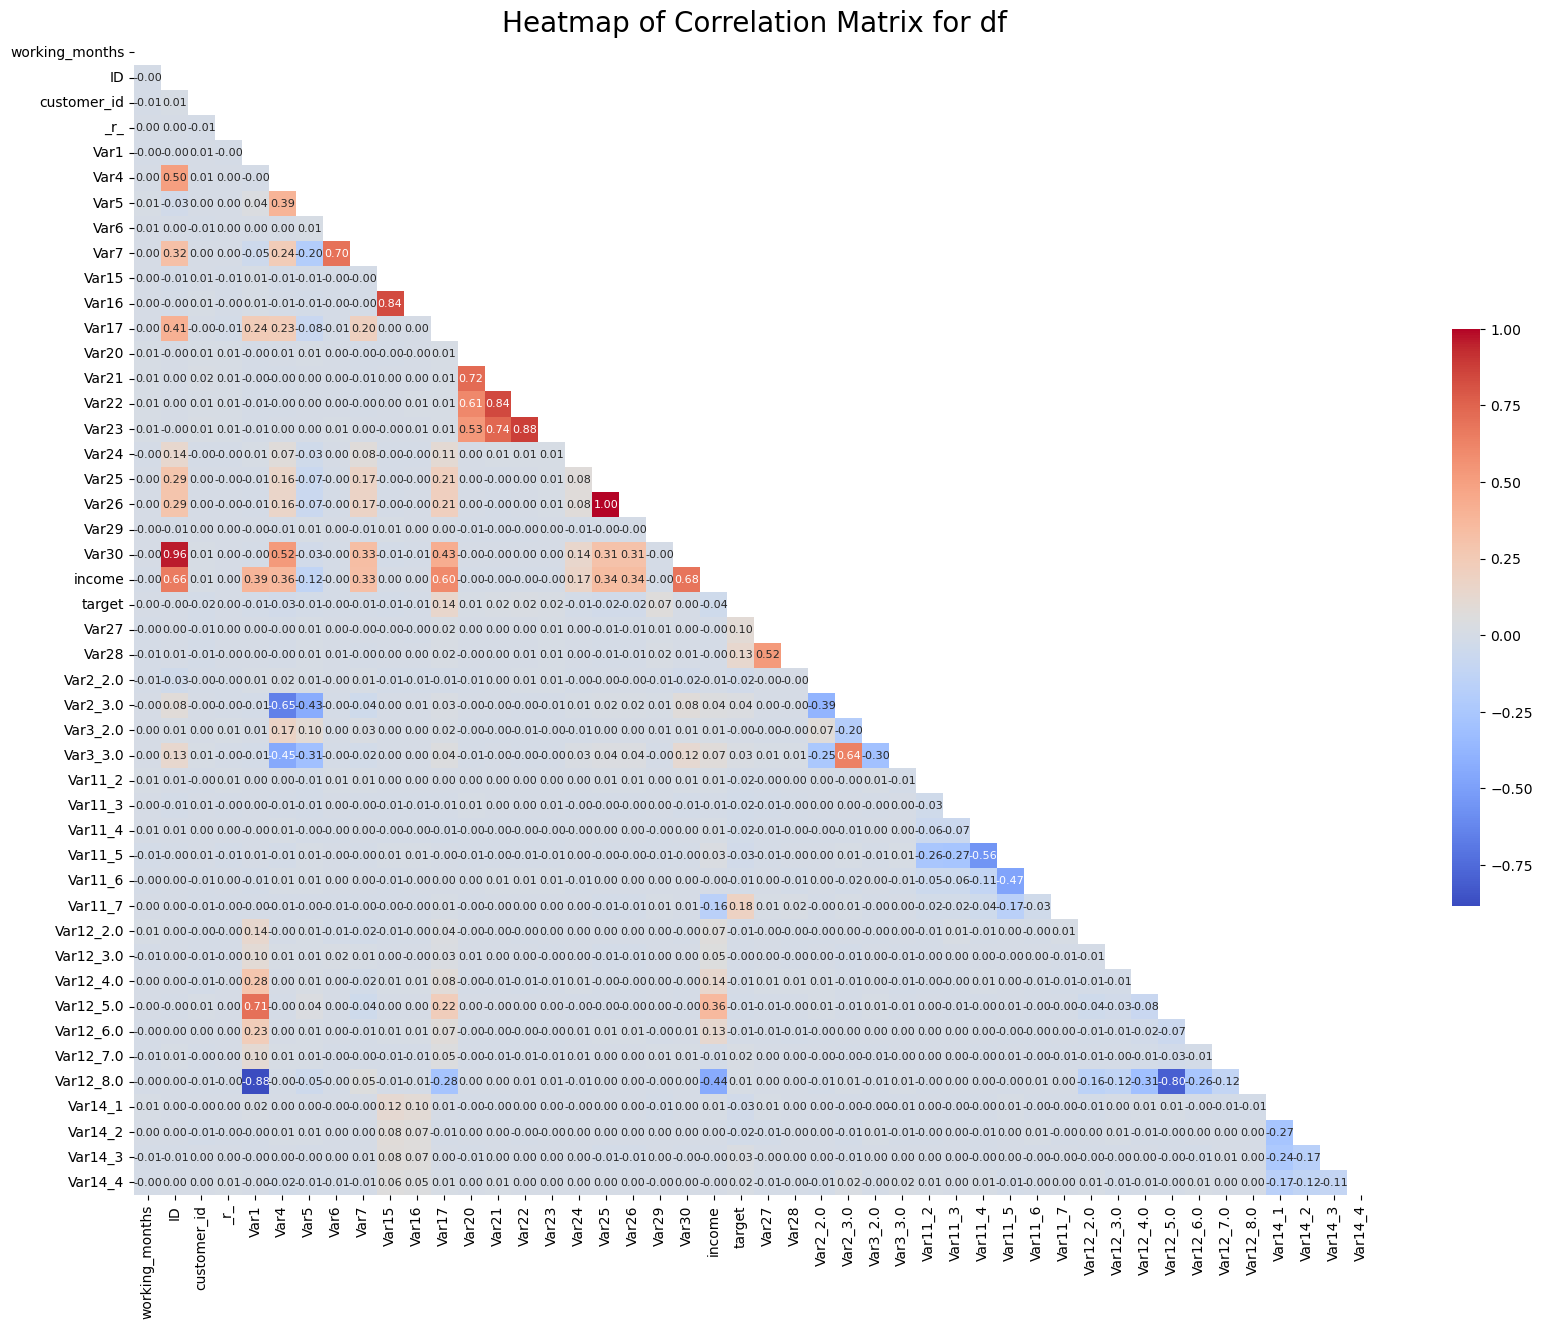

In [14]:
# Computing correlation measures for all variables
corr = df.corr()

# Setting canvas for plots 
plt.figure(figsize=(20, 15)) 

# Only triangular matrix 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Drawing a heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            cbar_kws={'shrink': .5}, annot_kws={'size': 8})


plt.title('Heatmap of Correlation Matrix for df', fontsize=20)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()